+++++++++++++++ single var ols++++++++++++++++++++++++++++++++++

No Split R^2 0.8824800586389379

Running Sum is:  -241.82668706780146

Average:  -30.228335883475182

+++++++++++++++++++++++++++++++++++++Multi var ols+++++++++++++++++++++++++++++++++++++++++++++++++

No Split R^2 0.9194364201990829

Running Sum is:  -946.5185860075643

average:  -118.31482325094554

********************************Arima********************************************************8
************************************************** SUPPORT VECTOR MACHINE*************************************************


ModuleNotFoundError: No module named 'fbprophet'

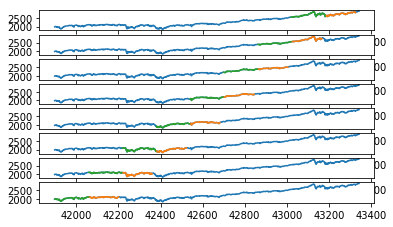

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import utils
#import pyramid as pm

# matplotlib.use('agg')
excel_file = "/Users/BrandtLawson/Desktop/Combined_Values.csv"
Combined_Values = pd.read_csv(excel_file)
#spCommData = pd.read_csv(r"comSP.csv")

#plotting individual columns
#Combined_Values.plot(kind='scatter',x='Date',y='Close',color='red')
# # plt.show()
# #Combined_Values.plot(kind='scatter',x='Date',y='GDP',color='blue')
# # plt.show()
# Combined_Values.plot(kind='scatter',x='Date',y='USD_to_EUR',color='green')
# # plt.show()
# Combined_Values.plot(kind='scatter',x='Date',y='NonFarm_Payroll',color='yellow')
# # plt.show()
# Combined_Values.plot(kind='scatter',x='Date',y='3_month_Libor',color='orange')
# # plt.show()
# Combined_Values.plot(kind='scatter',x='Date',y='Unemployment',color='purple')
# plt.show()

#getting data in a range where we have data from all columns
Combined_Values = Combined_Values.drop(Combined_Values.index[0:9]) #gets rid of first N/A
Combined_Values = Combined_Values.drop(Combined_Values.index[1000:17989]) #gets rid of last N/A
Combined_Values.head()

plt.clf()
ax = plt.gca()
# Combined_Values.plot(kind='scatter',x='Date',y='Close',color='red', ax=ax)
# Combined_Values.plot(kind='scatter',x='Date',y='GDP',color='blue',ax=ax)
# Combined_Values.plot(kind='scatter',x='Date',y='USD_to_EUR',color='green',ax=ax)
# Combined_Values.plot(kind="scatter", x='Date', y='NonFarm_Payroll', color='yellow', ax=ax)
# Combined_Values.plot(kind='scatter',x='Date',y='3_month_Libor',color='orange',ax=ax)
# Combined_Values.plot(kind='scatter',x='Date',y='Unemployment',color='purple',ax=ax)

A = Combined_Values.values
y = A[:, 5]
y = y.reshape(-1,1)
# print(type(y))     #we want numpy.ndaray
# print(y.shape)     #we want dimensions 1000x1
x = A[:,10]
x = x.reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(x,y)
prediction_space = np.linspace(min(x),max(x)).reshape(-1, 1)
# plt.scatter(x, y, color='blue')
# plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
# plt.show()
print("+++++++++++++++ single var ols++++++++++++++++++++++++++++++++++")
print("\nNo Split R^2 " + str(reg.score(x, y)))
# cv_results = cross_val_score(reg, x, y, cv=5, scoring='r2')
#print(cv_results)
# print("5 fold mean R^2 " + str(np.mean(cv_results)))



max_size = int(np.size(x,0)/10)
tscv = TimeSeriesSplit(max_train_size = max_size, n_splits = 8)
index =1

runningSum = 0
numIter = 0
#fig = plt.figure()

#
#for train_index, test_index in tscv.split(x):
#    plt.subplot(910 + index)
 #   plt.plot(X_train, y_train)
  #  plt.plot(X_test, y_test)
    
#


for train_index, test_index in tscv.split(x):
    X_train, X_test = x[train_index], x[test_index]
    date_train, date_test = A[train_index,0], A[test_index,0]
    # print(str(np.size(X_train, 0)) + "size")
    y_train, y_test = y[train_index], y[test_index]
    reg.fit(X_train, y_train)
    #print("split#" + str(index) + "  test-score " + str(reg.score(X_test, y_test)) + " self-score " + str( reg.score(X_train, y_train)))
    runningSum += reg.score(X_test, y_test)
    numIter += 1
    plt.subplot(910 + index)
    plt.plot(A[:,0], y)
    plt.plot(date_train, y_train)
    plt.plot(date_test, y_test)
   


    # print ("Training indices:", train_index,"\n\nTesting indices: ", test_index) #this shows graphically the indexes that are being trained and the indexes being tested during each iteration
    # print(X_train)
    index += 1


print("\nRunning Sum is:  " + str(runningSum))
print("\nAverage:  " + str(runningSum/numIter) + "\n")
# plt.show()

print("+++++++++++++++++++++++++++++++++++++Multi var ols+++++++++++++++++++++++++++++++++++++++++++++++++")

A = Combined_Values.values
y = A[:, 5]
y = y.reshape(-1,1)
# print(type(y))     #we want numpy.ndaray
# print(y.shape)     #we want dimensions 1000x1
x = A[:,6:]
x = x.reshape(-1,6)

reg = linear_model.LinearRegression()
reg.fit(x,y)
# prediction_space = np.linspace(min(x),max(x)).reshape(-1, 6)
# plt.scatter(x, y, color='blue')
# plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
# plt.show()
print("\nNo Split R^2 " + str(reg.score(x, y)))
# cv_results = cross_val_score(reg, x, y, cv=5, scoring='r2')
# print(cv_results)
# print("5 fold mean R^2 " + str(np.mean(cv_results)))


max_size = int(np.size(x,0)/10)
index =1

runningSum = 0
numIter = 0
# print("\n",A[100:130,6:],"\n")
for train_index, test_index in tscv.split(x):
    X_train, X_test = x[train_index], x[test_index]
    # print(str(np.size(X_train, 0)) + "size")
    y_train, y_test = y[train_index], y[test_index]
    reg.fit(X_train, y_train)
    #print("split#" + str(index) + "  test-score " + str(reg.score(X_test, y_test)) + " self-score " + str( reg.score(X_train, y_train)))
    runningSum = runningSum + reg.score(X_test, y_test) 
    numIter = numIter + 1
    # plt.subplot(910 + index)
    # plt.plot(X_train, y_train)
    # plt.plot(X_test, y_test)

    #print ("Training indices:", train_index,"\n\nTesting indices: ", test_index) #this shows graphically the indexes that are being trained and the indexes being tested during each iteration
    # print(X_train)
    index = index + 1


print("\nRunning Sum is:  " + str(runningSum))
print("\naverage:  " + str(runningSum/numIter) + "\n")
# plt.show()


print("********************************Arima********************************************************8")

from statsmodels.tsa.arima_model import ARIMA

A = Combined_Values.values
y = A[:, 5]
y = y.reshape(-1,1)
# print(type(y))     #we want numpy.ndaray
# print(y.shape)     #we want dimensions 1000x1
x = A[:,8]
x = x.reshape(-1,1)

#model = ARIMA(y, order=(5,1,0))
#results_ARIMA = model.fit(disp=-1)  




print("************************************************** SUPPORT VECTOR MACHINE*************************************************")



# print(x.shape)
# print(y.shape)


# stepwise_model = pm.auto_arima(y, exogeneous=x)


# maybe just run a bunch of single var
# then combine if not worried about run  time

# support vector machines through scikitlearn
# should do what we're talking about


############******************************Prophet*************

from fbprophet import Prophet

